In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 90)
pd.options.mode.chained_assignment = None 

### Загрузка данных

In [3]:
df = pd.read_csv("Example_WineDataset", sep='\t', encoding='utf-8')
df.drop(columns = "Unnamed: 0", inplace = True)
df

,name,Название русское,Производитель (юрлицо),Бренд,Цвет,Сахар,Алкоголь,Страна,Регион,Область,Апелласьон,Виноград,Описание,Дегустационная заметка / отзыв (дату см. по ссылке на блог),Оценка WP,Вина с такой же оценкой WP,Зона,Метод для игристых,Выдержка,Сайт производителя,Коммуна,Субзона,Категория,Предикат
0,"Alma Valley AV Cuvee Pinot Blanc Chardonnay Traminer белое полусухое, Россия",Альма Вэлли АВ Кюве Пино Блан Шардоне Траминер\t\t\t\t\t\t\t\t\t\t\t,ООО «Инвест Плюс»\t\t\t\t\t\t\t\t\t\t\t,....Альма Вэлли (Alma Valley),..Белые вина России,полусухое\t\t\t\t\t\t\t\t\t\t\t,"14,5%\t\t\t\t\t\t\t\t\t\t\t",Россия,...Крым,Западный Крым\t\t\t\t\t\t\t\t\t\t\t,...Крым ЗГУ,.Пино Блан (Pinot Blanc) / .Шардоне (Chardonnay) / .Траминер (Traminer),Виноградники расположены в Альминской долине в местечке Песчаное в Западном Крыму. Уро...,"Винтаж 2020\r\n Цвет соломенный, прозрачный, блестящий. Аромат интенсивный, роза, абри...","15,5\t\t\t\t\t\t\t\t\t\t\t","15-15,75 / 20",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Burnier Cabernet Franc красное сухое, Россия",Бюрнье Каберне Фран\t\t\t\t\t\t\t\t\t\t\t,"ООО ""ГРАНД-ВИНО""\t\t\t\t\t\t\t\t\t\t\t",....Бюрнье (Burnier),Красные вина,сухое\t\t\t\t\t\t\t\t\t\t\t,"13,5%\t\t\t\t\t\t\t\t\t\t\t",Россия,...Краснодарский край,....Кубань,NaN,.Каберне Фран (Cabernet Franc),"Виноградник расположен на юго-западном склоне Кавказского хребта, между Анапой и Новор...","Винтаж 2013\r\n Цвет гранатовый, прозрачный, блестящий. Аромат обволакивающий, резинов...",16.5 / 17\t\t\t\t\t\t\t\t\t\t\t,"16-16,5 / 20 / 17-17,5 / 20",Бюрнье-Сенетха\t\t\t\t\t\t\t\t\t\t\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Burnier Viognier белое сухое, Россия",Бюрнье Вионье\t\t\t\t\t\t\t\t\t\t\t,"ООО ""ГРАНД-ВИНО""\t\t\t\t\t\t\t\t\t\t\t",....Бюрнье (Burnier),Белые вина,сухое\t\t\t\t\t\t\t\t\t\t\t,14%\t\t\t\t\t\t\t\t\t\t\t,Россия,...Краснодарский край,....Кубань,NaN,.Вионье (Viognier),Сортовой состав: Вионье\n\nЦвет золотисто-желтый. Элегантный аромат с нотами сухофрукт...,"Винтаж 2013\r\n Цвет светло-золотистый с лимонными бликами, прозрачный, блестящий. Аро...",16.5\t\t\t\t\t\t\t\t\t\t\t,"16-16,5 / 20",Бюрнье-Сенетха\t\t\t\t\t\t\t\t\t\t\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Burnier Lublu белое сухое, Россия",Бюрнье Люблю\t\t\t\t\t\t\t\t\t\t\t,"ООО ""ГРАНД-ВИНО""\t\t\t\t\t\t\t\t\t\t\t",....Бюрнье (Burnier),Белые вина,сухое\t\t\t\t\t\t\t\t\t\t\t,"13,4%\t\t\t\t\t\t\t\t\t\t\t",Россия,...Краснодарский край,....Кубань,NaN,.Шардоне (Chardonnay) / .Пино Блан (Pinot Blanc) / .Пино Гри (Pinot Gris) / .Мускат (M...,"Виноградники в станице Натухаевской на юго-западном склоне Кавказского хребта, между А...","Винтаж 2010\r\n Цвет светло-золотистый, прозрачный, блестящий. Аромат средней интенсив...",16 / 16.5\t\t\t\t\t\t\t\t\t\t\t,"16-16,5 / 20",Бюрнье-Сенетха\t\t\t\t\t\t\t\t\t\t\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Burnier Merlot красное сухое, Россия",Бюрнье Мерло\t\t\t\t\t\t\t\t\t\t\t,"ООО ""ГРАНД-ВИНО""\t\t\t\t\t\t\t\t\t\t\t",....Бюрнье (Burnier),Красные вина,сухое\t\t\t\t\t\t\t\t\t\t\t,14%\t\t\t\t\t\t\t\t\t\t\t,Россия,...Краснодарский край,....Кубань,NaN,.Мерло (Merlot),"Виноградник расположен на юго-западном склоне Кавказского хребта, между Анапой и Новор...","Винтаж 2009\r\n Цвет насыщенный вишнёвый с красным ободком, практически непрозрачный, ...",16 / 16.5\t\t\t\t\t\t\t\t\t\t\t,"16-16,5 / 20",Бюрнье-Сенетха\t\t\t\t\t\t\t\t\t\t\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,"Cadozos Tinta Fina y Pinot Noir VT Castilla y Leon красное сухое, Испания",Кадосос Тинта Фина и Пино Нуар Кастилия и Лион\t\t\t\t\t\t\t\t\t\t\t,Dehesa de Cadozos\t\t\t\t\t\t\t\t\t\t\t,....Cadozos (Кадосос),Красные вина,сухое\t\t\t\t\t\t\t\t\t\t\t,14%\t\t\t\t\t\t\t\t\t\t\t,Испания,...Кастилия-и-Леон (Castilla y León),Самора\t\t\t\t\t\t\t\t\t\t\t,...Castilla y Leon IGP (Кастилья-Леон),.Темпранильо (Tempranillo) / .Пино Нуар (Pinot Noir),NaN,"Винтаж 2005\r\nАромат средней интенсивности, гармоничный - молочный шоколад, с

### Удаление пустых столбцов

In [4]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return null_count,missing_percent

In [5]:
print("Количество NaN в столбцах:","\n")
null_count,missing_percent = get_numerical_summary(df)

Количество NaN в столбцах: 

Название русское : 25 (0.699%)
Производитель (юрлицо) : 10 (0.279%)
Цвет : 2 (0.056%)
Алкоголь : 6 (0.168%)
Регион : 42 (1.174%)
Область : 868 (24.253%)
Апелласьон : 642 (17.938%)
Виноград : 4 (0.112%)
Описание : 381 (10.645%)
Дегустационная заметка / отзыв (дату см. по ссылке на блог)  : 8 (0.224%)
Оценка WP : 1 (0.028%)
Вина с такой же оценкой WP : 24 (0.671%)
Зона : 1881 (52.557%)
Метод для игристых : 3406 (95.166%)
Выдержка : 3299 (92.177%)
Сайт производителя : 1495 (41.771%)
Коммуна : 3003 (83.906%)
Субзона : 3485 (97.374%)
Категория : 3485 (97.374%)
Предикат : 3575 (99.888%)


In [6]:
print("Количество до удаления:",len(df.columns))
for col, per in missing_percent.items():
    if per > 40:
        df.drop(col, axis = 1, inplace = True)
        
print("Количество после удаления:",len(df.columns))

Количество до удаления: 24
Количество после удаления: 16


In [7]:
print("Количество NaN в столбцах:","\n")
_ = get_numerical_summary(df)

Количество NaN в столбцах: 

Название русское : 25 (0.699%)
Производитель (юрлицо) : 10 (0.279%)
Цвет : 2 (0.056%)
Алкоголь : 6 (0.168%)
Регион : 42 (1.174%)
Область : 868 (24.253%)
Апелласьон : 642 (17.938%)
Виноград : 4 (0.112%)
Описание : 381 (10.645%)
Дегустационная заметка / отзыв (дату см. по ссылке на блог)  : 8 (0.224%)
Оценка WP : 1 (0.028%)
Вина с такой же оценкой WP : 24 (0.671%)


### Удаление пустых строк

In [8]:
df.loc[:,"missing_count"] = df.iloc[:, :].isnull().sum(axis=1)
df.loc[:,"missing_count"] = df["missing_count"].apply(lambda x: int(x/len(df.columns)*100))

In [9]:
print("Количество строк, которые заполнены больше чем на 50%:",len(df[df["missing_count"]>50]))

Количество строк, которые заполнены больше чем на 50%: 0


In [10]:
df.drop(columns = "missing_count",inplace =True)

### Подготовка данных

In [11]:
df = df[["name","Производитель (юрлицо)","Бренд","Цвет","Сахар","Алкоголь","Страна","Регион","Область","Апелласьон","Виноград"]]

In [12]:
df

,name,Производитель (юрлицо),Бренд,Цвет,Сахар,Алкоголь,Страна,Регион,Область,Апелласьон,Виноград
0,"Alma Valley AV Cuvee Pinot Blanc Chardonnay Traminer белое полусухое, Россия",ООО «Инвест Плюс»\t\t\t\t\t\t\t\t\t\t\t,....Альма Вэлли (Alma Valley),..Белые вина России,полусухое\t\t\t\t\t\t\t\t\t\t\t,"14,5%\t\t\t\t\t\t\t\t\t\t\t",Россия,...Крым,Западный Крым\t\t\t\t\t\t\t\t\t\t\t,...Крым ЗГУ,.Пино Блан (Pinot Blanc) / .Шардоне (Chardonnay) / .Траминер (Traminer)
1,"Burnier Cabernet Franc красное сухое, Россия","ООО ""ГРАНД-ВИНО""\t\t\t\t\t\t\t\t\t\t\t",....Бюрнье (Burnier),Красные вина,сухое\t\t\t\t\t\t\t\t\t\t\t,"13,5%\t\t\t\t\t\t\t\t\t\t\t",Россия,...Краснодарский край,....Кубань,NaN,.Каберне Фран (Cabernet Franc)
2,"Burnier Viognier белое сухое, Россия","ООО ""ГРАНД-ВИНО""\t\t\t\t\t\t\t\t\t\t\t",....Бюрнье (Burnier),Белые вина,сухое\t\t\t\t\t\t\t\t\t\t\t,14%\t\t\t\t\t\t\t\t\t\t\t,Россия,...Краснодарский край,....Кубань,NaN,.Вионье (Viognier)
3,"Burnier Lublu белое сухое, Россия","ООО ""ГРАНД-ВИНО""\t\t\t\t\t\t\t\t\t\t\t",....Бюрнье (Burnier),Белые вина,сухое\t\t\t\t\t\t\t\t\t\t\t,"13,4%\t\t\t\t\t\t\t\t\t\t\t",Россия,...Краснодарский край,....Кубань,NaN,.Шардоне (Chardonnay) / .Пино Блан (Pinot Blanc) / .Пино Гри (Pinot Gris) / .Мускат (M...
4,"Burnier Merlot красное сухое, Россия","ООО ""ГРАНД-ВИНО""\t\t\t\t\t\t\t\t\t\t\t",....Бюрнье (Burnier),Красные вина,сухое\t\t\t\t\t\t\t\t\t\t\t,14%\t\t\t\t\t\t\t\t\t\t\t,Россия,...Краснодарский край,....Кубань,NaN,.Мерло (Merlot)
...,...,...,...,...,...,...,...,...,...,...,...
3574,"Cadozos Tinta Fina y Pinot Noir VT Castilla y Leon красное сухое, Испания",Dehesa de Cadozos\t\t\t\t\t\t\t\t\t\t\t,....Cadozos (Кадосос),Красные вина,сухое\t\t\t\t\t\t\t\t\t\t\t,14%\t\t\t\t\t\t\t\t\t\t\t,Испания,...Кастилия-и-Леон (Castilla y León),Самора\t\t\t\t\t\t\t\t\t\t\t,...Castilla y Leon IGP (Кастилья-Леон),.Темпранильо (Tempranillo) / .Пино Нуар (Pinot Noir)
3575,"Bressan Pinot Nero Venezia Giulia IGT красное сухое, Италия",Az. Agr. Bressan Nereo\t\t\t\t\t\t\t\t\t\t\t,....Bressan (Брессан),Красные вина,сухое\t\t\t\t\t\t\t\t\t\t\t,13%\t\t\t\t\t\t\t\t\t\t\t,Италия,...Фриули-Венеция-Джулия (Friuli-Venezia Giulia),Гориция\t\t\t\t\t\t\t\t\t\t\t,...Venezia Giulia IGT (Венеция Джулия),.Пино Неро (Pinot Nero)
3576,"Bodegas y Vinedos Raul Perez Palazuelo DO Bierzo красное сухое, Испания","Bodega Matador, Raul Perez Bodegas y Vinedos\t\t\t\t\t\t\t\t\t\t\t",....Bodegas y Vinedos Raul Perez (Бодегас и Виньедос Рауль Перес),Красные вина,сухое\t\t\t\t\t\t\t\t\t\t\t,"13,5%\t\t\t\t\t\t\t\t\t\t\t",Испания,...Кастилия-и-Леон (Castilla y León),Леон\t\t\t\t\t\t\t\t\t\t\t,...Bierzo DO (Бьерсо Д.О.),.Менсия (Mencia)
3577,Barranco Oscuro 1368 Cerro Las Monjas Vino de la Tierra Contraviesa-Alpujarra красное ...,Bodega Barranco Oscuro SL\t\t\t\t\t\t\t\t\t\t\t,....Bodega Barranco Oscuro (Бодега Барранко Оскуро),Красные вина,сухое\t\t\t\t\t\t\t\t\t\t\t,15%\t\t\t\t\t\t\t\t\t\t\t,Испания,...Андалусия (Andalucía),Гранада\t\t\t\t\t\t\t\t\t\t\t,...Contraviesa-Alpujarra IGP (Контравьеса-Альпухарра),.Гарнача (Garnacha) / .Сира (Syrah) / .Каберне Совиньон (Cabernet Sauvignon) / .Каберн...


In [13]:
def func_1 (x):
    
    while x[0] == "." and len(x)>1:
        x = x[1:]
    
    if len(x.split("\t")) > 1:
        x = x.split("\t")[0]
    
    if x[0] == " " and len(x)>1:
        x = x[1:]
        
    if x[-1] == " ":
        x = x[:-1]
               
        
    return x

def func_2 (x):
    
    if len(x.split(" / .")) > 1:
        x = x.split(" / .")

    else:
        x = [x]
        
    return x 

In [14]:
df.loc[:,"Виноград"].fillna("(Неизвестно)", inplace = True)
for col in df.columns:
    df.loc[:,col].fillna("Неизвестно", inplace = True)
    df.loc[:,col] = df.loc[:,col].apply(lambda x: func_1 (str(x)))
    

df.loc[:,"Виноград"] = df.loc[:,"Виноград"].apply(lambda x: func_2 (str(x)))



In [15]:
df

,name,Производитель (юрлицо),Бренд,Цвет,Сахар,Алкоголь,Страна,Регион,Область,Апелласьон,Виноград
0,"Alma Valley AV Cuvee Pinot Blanc Chardonnay Traminer белое полусухое, Россия",ООО «Инвест Плюс»,Альма Вэлли (Alma Valley),Белые вина России,полусухое,"14,5%",Россия,Крым,Западный Крым,Крым ЗГУ,"[Пино Блан (Pinot Blanc), Шардоне (Chardonnay), Траминер (Traminer)]"
1,"Burnier Cabernet Franc красное сухое, Россия","ООО ""ГРАНД-ВИНО""",Бюрнье (Burnier),Красные вина,сухое,"13,5%",Россия,Краснодарский край,Кубань,Неизвестно,[Каберне Фран (Cabernet Franc)]
2,"Burnier Viognier белое сухое, Россия","ООО ""ГРАНД-ВИНО""",Бюрнье (Burnier),Белые вина,сухое,14%,Россия,Краснодарский край,Кубань,Неизвестно,[Вионье (Viognier)]
3,"Burnier Lublu белое сухое, Россия","ООО ""ГРАНД-ВИНО""",Бюрнье (Burnier),Белые вина,сухое,"13,4%",Россия,Краснодарский край,Кубань,Неизвестно,"[Шардоне (Chardonnay), Пино Блан (Pinot Blanc), Пино Гри (Pinot Gris), Мускат (Muscat)]"
4,"Burnier Merlot красное сухое, Россия","ООО ""ГРАНД-ВИНО""",Бюрнье (Burnier),Красные вина,сухое,14%,Россия,Краснодарский край,Кубань,Неизвестно,[Мерло (Merlot)]
...,...,...,...,...,...,...,...,...,...,...,...
3574,"Cadozos Tinta Fina y Pinot Noir VT Castilla y Leon красное сухое, Испания",Dehesa de Cadozos,Cadozos (Кадосос),Красные вина,сухое,14%,Испания,Кастилия-и-Леон (Castilla y León),Самора,Castilla y Leon IGP (Кастилья-Леон),"[Темпранильо (Tempranillo), Пино Нуар (Pinot Noir)]"
3575,"Bressan Pinot Nero Venezia Giulia IGT красное сухое, Италия",Az. Agr. Bressan Nereo,Bressan (Брессан),Красные вина,сухое,13%,Италия,Фриули-Венеция-Джулия (Friuli-Venezia Giulia),Гориция,Venezia Giulia IGT (Венеция Джулия),[Пино Неро (Pinot Nero)]
3576,"Bodegas y Vinedos Raul Perez Palazuelo DO Bierzo красное сухое, Испания","Bodega Matador, Raul Perez Bodegas y Vinedos",Bodegas y Vinedos Raul Perez (Бодегас и Виньедос Рауль Перес),Красные вина,сухое,"13,5%",Испания,Кастилия-и-Леон (Castilla y León),Леон,Bierzo DO (Бьерсо Д.О.),[Менсия (Mencia)]
3577,Barranco Oscuro 1368 Cerro Las Monjas Vino de la Tierra Contraviesa-Alpujarra красное ...,Bodega Barranco Oscuro SL,Bodega Barranco Oscuro (Бодега Барранко Оскуро),Красные вина,сухое,15%,Испания,Андалусия (Andalucía),Гранада,Contraviesa-Alpujarra IGP (Контравьеса-Альпухарра),"[Гарнача (Garnacha), Сира (Syrah), Каберне Совиньон (Cabernet Sauvignon), Каберне Фран..."


In [16]:
df.replace({'Белые вина России':'Белые вина', 'Красные вина России':'Красные вина', 'Розовые вина России': 'Розовые вина',            'Белые игристые вина':'Белые вина', 'Розовые игристые вина':'Розовые вина', 'Красные игристые вина': 'Красные вина',
            'Белые вина / Оранжевые вина':'Белые вина','Белые кардиналы':'Белые вина', 'Catena Zapata (Катена Сапата)':'Красные вина'}, inplace = True)

### Визуализация данных

Text(0, 0.5, 'Страны')

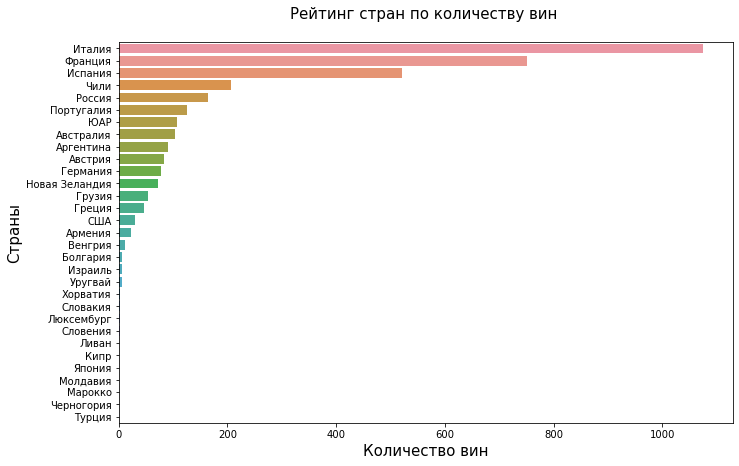

In [17]:
fig, ax = plt.subplots(figsize = (11,7))

sns.countplot(y="Страна",order = df["Страна"].value_counts().index, data=df)

ax.set_title("Рейтинг стран по количеству вин \n", fontsize = 15)
ax.set_xlabel('Количество вин', fontsize = 15)
ax.set_ylabel ('Страны', fontsize = 15)

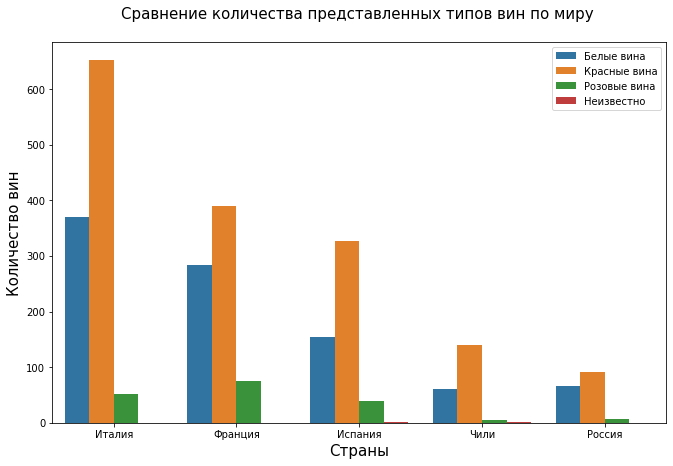

In [18]:
fig, ax = plt.subplots(figsize = (11,7))

sns.countplot(x="Страна",order = df["Страна"].value_counts()[:5].index, data=df, hue = "Цвет")

ax.set_title("Сравнение количества представленных типов вин по миру \n", fontsize = 15)
ax.set_ylabel('Количество вин', fontsize = 15)
ax.set_xlabel ('Страны', fontsize = 15)
ax.legend(loc='upper right')

Text(0.5, 1.0, 'Сравнение доли представленных вин по Россий \n')

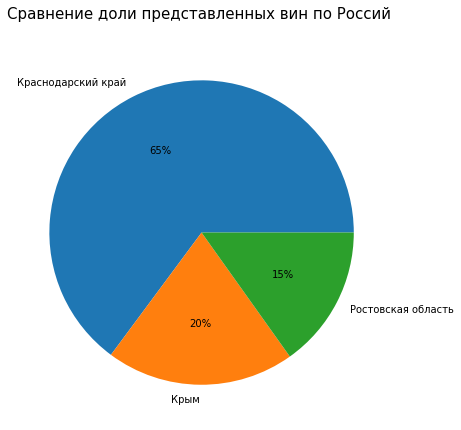

In [19]:
fig, ax = plt.subplots(figsize = (11,7))
plt.pie(df[df["Страна"] == "Россия"]["Регион"].value_counts(), labels= ['Краснодарский край', 'Крым', 'Ростовская область'], autopct='%.0f%%')
ax.set_title("Сравнение доли представленных вин по Россий \n", fontsize = 15)

In [20]:
print("Сводная таблица 1. Количество представленных вин по регионам ")
df.loc[df["Страна"]=="Россия",["Регион","Область","Цвет","name"]].groupby(["Регион","Область","Цвет"]).count()

Сводная таблица 1. Количество представленных вин по регионам 


name
Регион             Область                               Цвет              
Краснодарский край Кубань                                Белые вина      33
                                                         Красные вина    40
                                                         Розовые вина     5
                   Кубань / Кубань. Анапа                Красные вина     4
                   Кубань / Кубань. Крымск               Белые вина       6
                                                         Красные вина     6
                                                         Розовые вина     1
                   Кубань / Кубань. Новороссийск         Красные вина     8
                   Кубань / Кубань. Таманский полуостров Белые вина       2
                                                         Красные вина     2
Крым               Восточный Крым                        Белые вина       4
                                                         Красные вина     2
                   Западный Крым                         Белые вина      13
                                                         Красные вина    13
                   Неизвестно                            Белые вина       1
Ростовская область Долина Дона                           Белые вина       8
                                                         Красные вина    16
                                                         Розовые вина     1

Text(0.5, 1.0, 'Сравнение количества представленных типов вин по Россий \n')

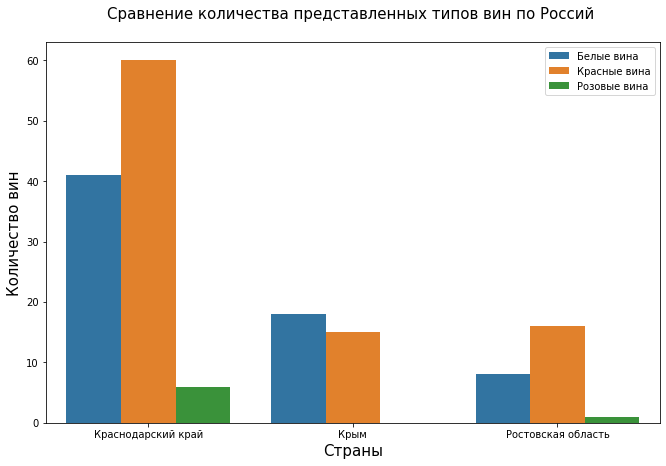

In [21]:
fig, ax = plt.subplots(figsize = (11,7))

sns.countplot(x="Регион", order = df[df["Страна"] == "Россия"]["Регион"].value_counts().index ,data=df[df["Страна"] == "Россия"], hue = "Цвет")

ax.set_ylabel('Количество вин', fontsize = 15)
ax.set_xlabel ('Страны', fontsize = 15)
ax.legend(loc='upper right')
ax.set_title("Сравнение количества представленных типов вин по Россий \n", fontsize = 15)

Text(0.5, 1.0, 'Рейтинг российских компаний по количеству представленных вин \n')

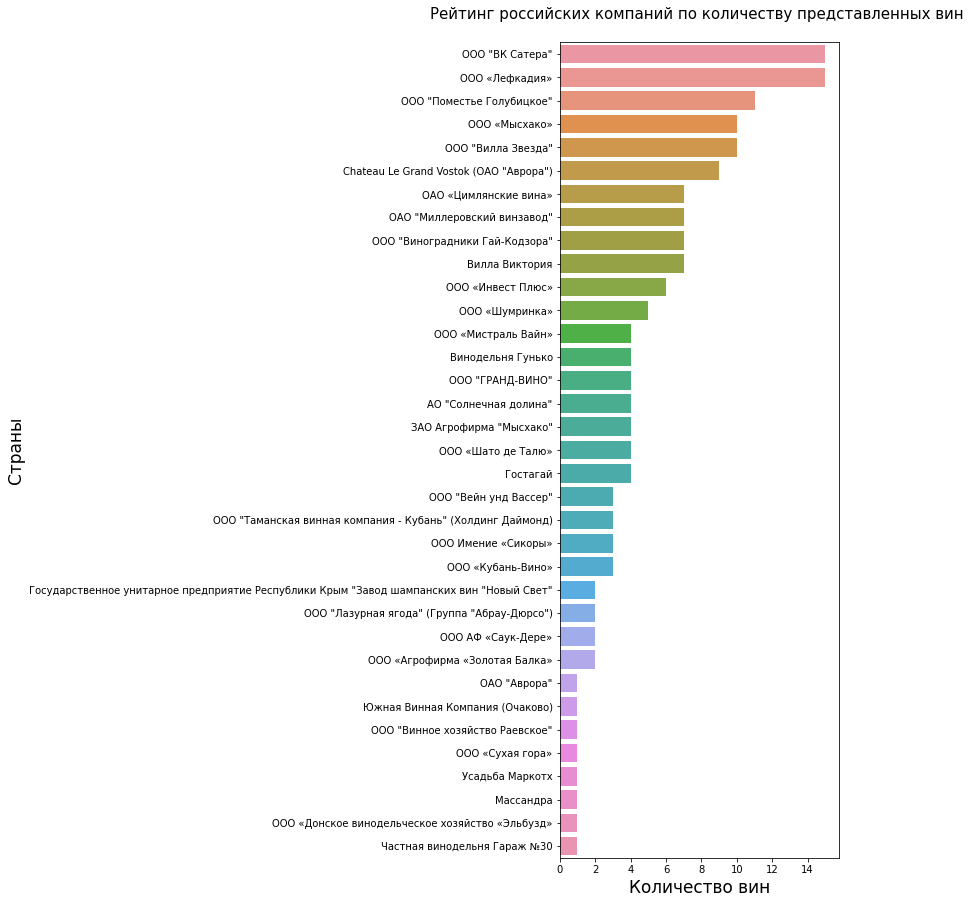

In [22]:
fig, ax = plt.subplots(figsize = (5,15))

sns.countplot(y="Производитель (юрлицо)",order = df[df["Страна"] == "Россия"]["Производитель (юрлицо)"].value_counts().index, data=df[df["Страна"] == "Россия"])

ax.set_xlabel('Количество вин', fontsize = 17)
ax.set_ylabel ('Страны', fontsize = 17)
ax.set_title("Рейтинг российских компаний по количеству представленных вин \n", fontsize = 15)